In [273]:
import os
import sys
import pathlib

PROJECT_FOLDER = pathlib.Path(os.getcwd()).resolve().parent
sys.path.append(str(PROJECT_FOLDER / 'src'))
from utils.dataset_utils import DatasetUtils
from scipy import stats

import pandas as pd
import seaborn as sns
import numpy as np


import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки графиков
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


style.use('seaborn-poster')
style.use('ggplot')

CUR_FILE_PATH = pathlib.Path(os.getcwd()).resolve()
DATA_PATH = CUR_FILE_PATH.parent.resolve() / 'data'
CUR_FILE_PATH

/var/folders/yx/7yys56tx67z0yvn74khb_1480000gp/T/ipykernel_83336/3778116626.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


PosixPath('/Users/Kirill/Documents/stocks-prediction/notebooks')

In [60]:
data_dict = {}
for stock_file in DATA_PATH.iterdir():
    if stock_file.stem == '.gitkeep':
        continue
    data_dict[stock_file.stem.split('_')[0]] = pd.read_csv(stock_file,  sep=",")
    


display(sber_stocks)
display(sber_stocks.info())
display(sber_stocks.describe())

<TICKER>  <PER>    <DATE>  <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>  \
0        SBER     60  20210111  110000  282.75  282.85  279.48   282.80   
1        SBER     60  20210111  120000  282.80  290.50  282.72   290.11   
2        SBER     60  20210111  130000  290.18  290.35  287.85   288.13   
3        SBER     60  20210111  140000  288.13  289.49  286.75   289.11   
4        SBER     60  20210111  150000  289.18  290.17  288.57   289.77   
...       ...    ...       ...     ...     ...     ...     ...      ...   
7785     SBER     60  20230531  200000  245.64  246.19  245.13   245.58   
7786     SBER     60  20230531  210000  245.62  246.20  245.02   245.84   
7787     SBER     60  20230531  220000  245.84  245.98  245.35   245.71   
7788     SBER     60  20230531  230000  245.71  245.85  245.61   245.68   
7789     SBER     60  20230601       0  245.67  246.23  245.64   246.17   

         <VOL>  
0     10682660  
1     23398690  
2      8483540  
3      7612690  
4      5651950  
...        ...  
7785   1490860  
7786   1167320  
7787    562350  
7788    540030  
7789    732210  

[7790 rows x 9 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7790 entries, 0 to 7789
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  7790 non-null   object 
 1   <PER>     7790 non-null   int64  
 2   <DATE>    7790 non-null   int64  
 3   <TIME>    7790 non-null   int64  
 4   <OPEN>    7790 non-null   float64
 5   <HIGH>    7790 non-null   float64
 6   <LOW>     7790 non-null   float64
 7   <CLOSE>   7790 non-null   float64
 8   <VOL>     7790 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 547.9+ KB


None

<PER>        <DATE>         <TIME>       <OPEN>       <HIGH>  \
count  7790.0  7.790000e+03    7790.000000  7790.000000  7790.000000   
mean     60.0  2.021789e+07  155293.966624   233.659015   234.452685   
std       0.0  7.434598e+03   53987.817174    81.844002    81.909642   
min      60.0  2.021011e+07       0.000000    89.600000   102.590000   
25%      60.0  2.021073e+07  130000.000000   139.962500   140.450000   
50%      60.0  2.022013e+07  160000.000000   258.780000   260.325000   
75%      60.0  2.022111e+07  190000.000000   303.035000   303.715000   
max      60.0  2.023060e+07  230000.000000   387.300000   388.110000   

             <LOW>      <CLOSE>         <VOL>  
count  7790.000000  7790.000000  7.790000e+03  
mean    232.831236   233.649286  5.429056e+06  
std      81.762913    81.839182  8.459391e+06  
min      89.590000    89.590000  6.670000e+04  
25%     139.550000   139.970000  1.344055e+06  
50%     257.505000   258.660000  3.112835e+06  
75%     302.400000   303.040000  6.262420e+06  
max     386.710000   387.600000  1.511237e+08

In [285]:
close_prices_df

MTSS    MOEX      VTBR    IRAO    MTLR    NLMK    ROSN  \
<DATETIME>                                                                      
2021-01-11 11:00:00  336.95  159.93  0.038840  5.4860   78.80  224.04  471.30   
2021-01-11 12:00:00  339.45  159.95  0.039390  5.5000   79.47  224.58  477.45   
2021-01-11 13:00:00  338.15  159.80  0.039325  5.4725   78.95  223.52  476.25   
2021-01-11 14:00:00  338.05  159.88  0.039255  5.4920   79.35  220.54  474.20   
2021-01-11 15:00:00  338.00  159.26  0.039275  5.4845   79.09  219.72  474.05   
...                     ...     ...       ...     ...     ...     ...     ...   
2023-05-31 15:00:00  315.15  114.33  0.022160  4.0700  181.00  144.22  441.65   
2023-05-31 16:00:00  314.55  114.64  0.022280  4.0600  181.97  145.08  443.90   
2023-05-31 17:00:00  314.80  114.96  0.022380  4.0630  177.45  145.22  446.35   
2023-05-31 18:00:00  314.00  116.36  0.022305  4.0635  178.68  147.02  447.75   
2023-05-31 19:00:00  317.25  116.76  0.022395  4.0810  177.93  147.42  447.15   

                       SNGS    LKOH    ALRS     RTSI    HYDR   AFLT    GAZP  \
<DATETIME>                                                                    
2021-01-11 11:00:00  37.470  5510.5  105.26  1461.00  0.8255  73.40  225.54   
2021-01-11 12:00:00  37.985  5624.5  104.85  1486.45  0.8245  73.92  230.91   
2021-01-11 13:00:00  37.620  5588.5  104.46  1480.86  0.8207  74.44  229.18   
2021-01-11 14:00:00  37.570  5599.5  104.83  1478.48  0.8266  74.08  228.44   
2021-01-11 15:00:00  37.660  5578.0  106.35  1478.72  0.8233  74.30  228.31   
...                     ...     ...     ...      ...     ...    ...     ...   
2023-05-31 15:00:00  24.345  5539.0   65.48  1046.85  0.8483  39.84  162.23   
2023-05-31 16:00:00  24.340  5544.0   65.55  1050.08  0.8526  39.94  162.35   
2023-05-31 17:00:00  24.305  5548.0   65.65  1053.80  0.8515  39.95  162.88   
2023-05-31 18:00:00  24.400  5557.0   65.61  1054.28  0.8526  40.13  162.53   
2023-05-31 19:00:00  24.450  5575.0   65.95  1055.41  0.8540  40.16  163.09   

                        GMKN    SBER    YNDX    MGNT  
<DATETIME>                                            
2021-01-11 11:00:00  26532.0  282.80  5232.8  5453.0  
2021-01-11 12:00:00  27046.0  290.11  5268.4  5463.0  
2021-01-11 13:00:00  26904.0  288.13  5267.6  5500.0  
2021-01-11 14:00:00  26846.0  289.11  5273.2  5530.0  
2021-01-11 15:00:00  26906.0  289.77  5278.2  5531.5  
...                      ...     ...     ...     ...  
2023-05-31 15:00:00  14476.0  244.29  2280.2  4173.5  
2023-05-31 16:00:00  14500.0  245.14  2308.2  4191.5  
2023-05-31 17:00:00  14522.0  245.80  2328.8  4210.0  
2023-05-31 18:00:00  14526.0  246.58  2336.0  4208.0  
2023-05-31 19:00:00  14572.0  245.91  2342.0  4224.5  

[5254 rows x 18 columns]

In [61]:
stock_names =  [k for k in data_dict.keys()]
stock_values = [v for v in data_dict.values()]
for i in range(len(stock_values)):
    DatasetUtils.create_datetime(stock_values[i], '<DATE>', '<TIME>')

['MTSS',
 'MOEX',
 'VTBR',
 'IRAO',
 'MTLR',
 'NLMK',
 'ROSN',
 'SNGS',
 'LKOH',
 'ALRS',
 'RTSI',
 'HYDR',
 'AFLT',
 'GAZP',
 'GMKN',
 'SBER',
 'YNDX',
 'MGNT']

## Несколько компаний

Необходимо скорректировать датасет GAZP_210111_230531.csv (разделитель ";" на ",")

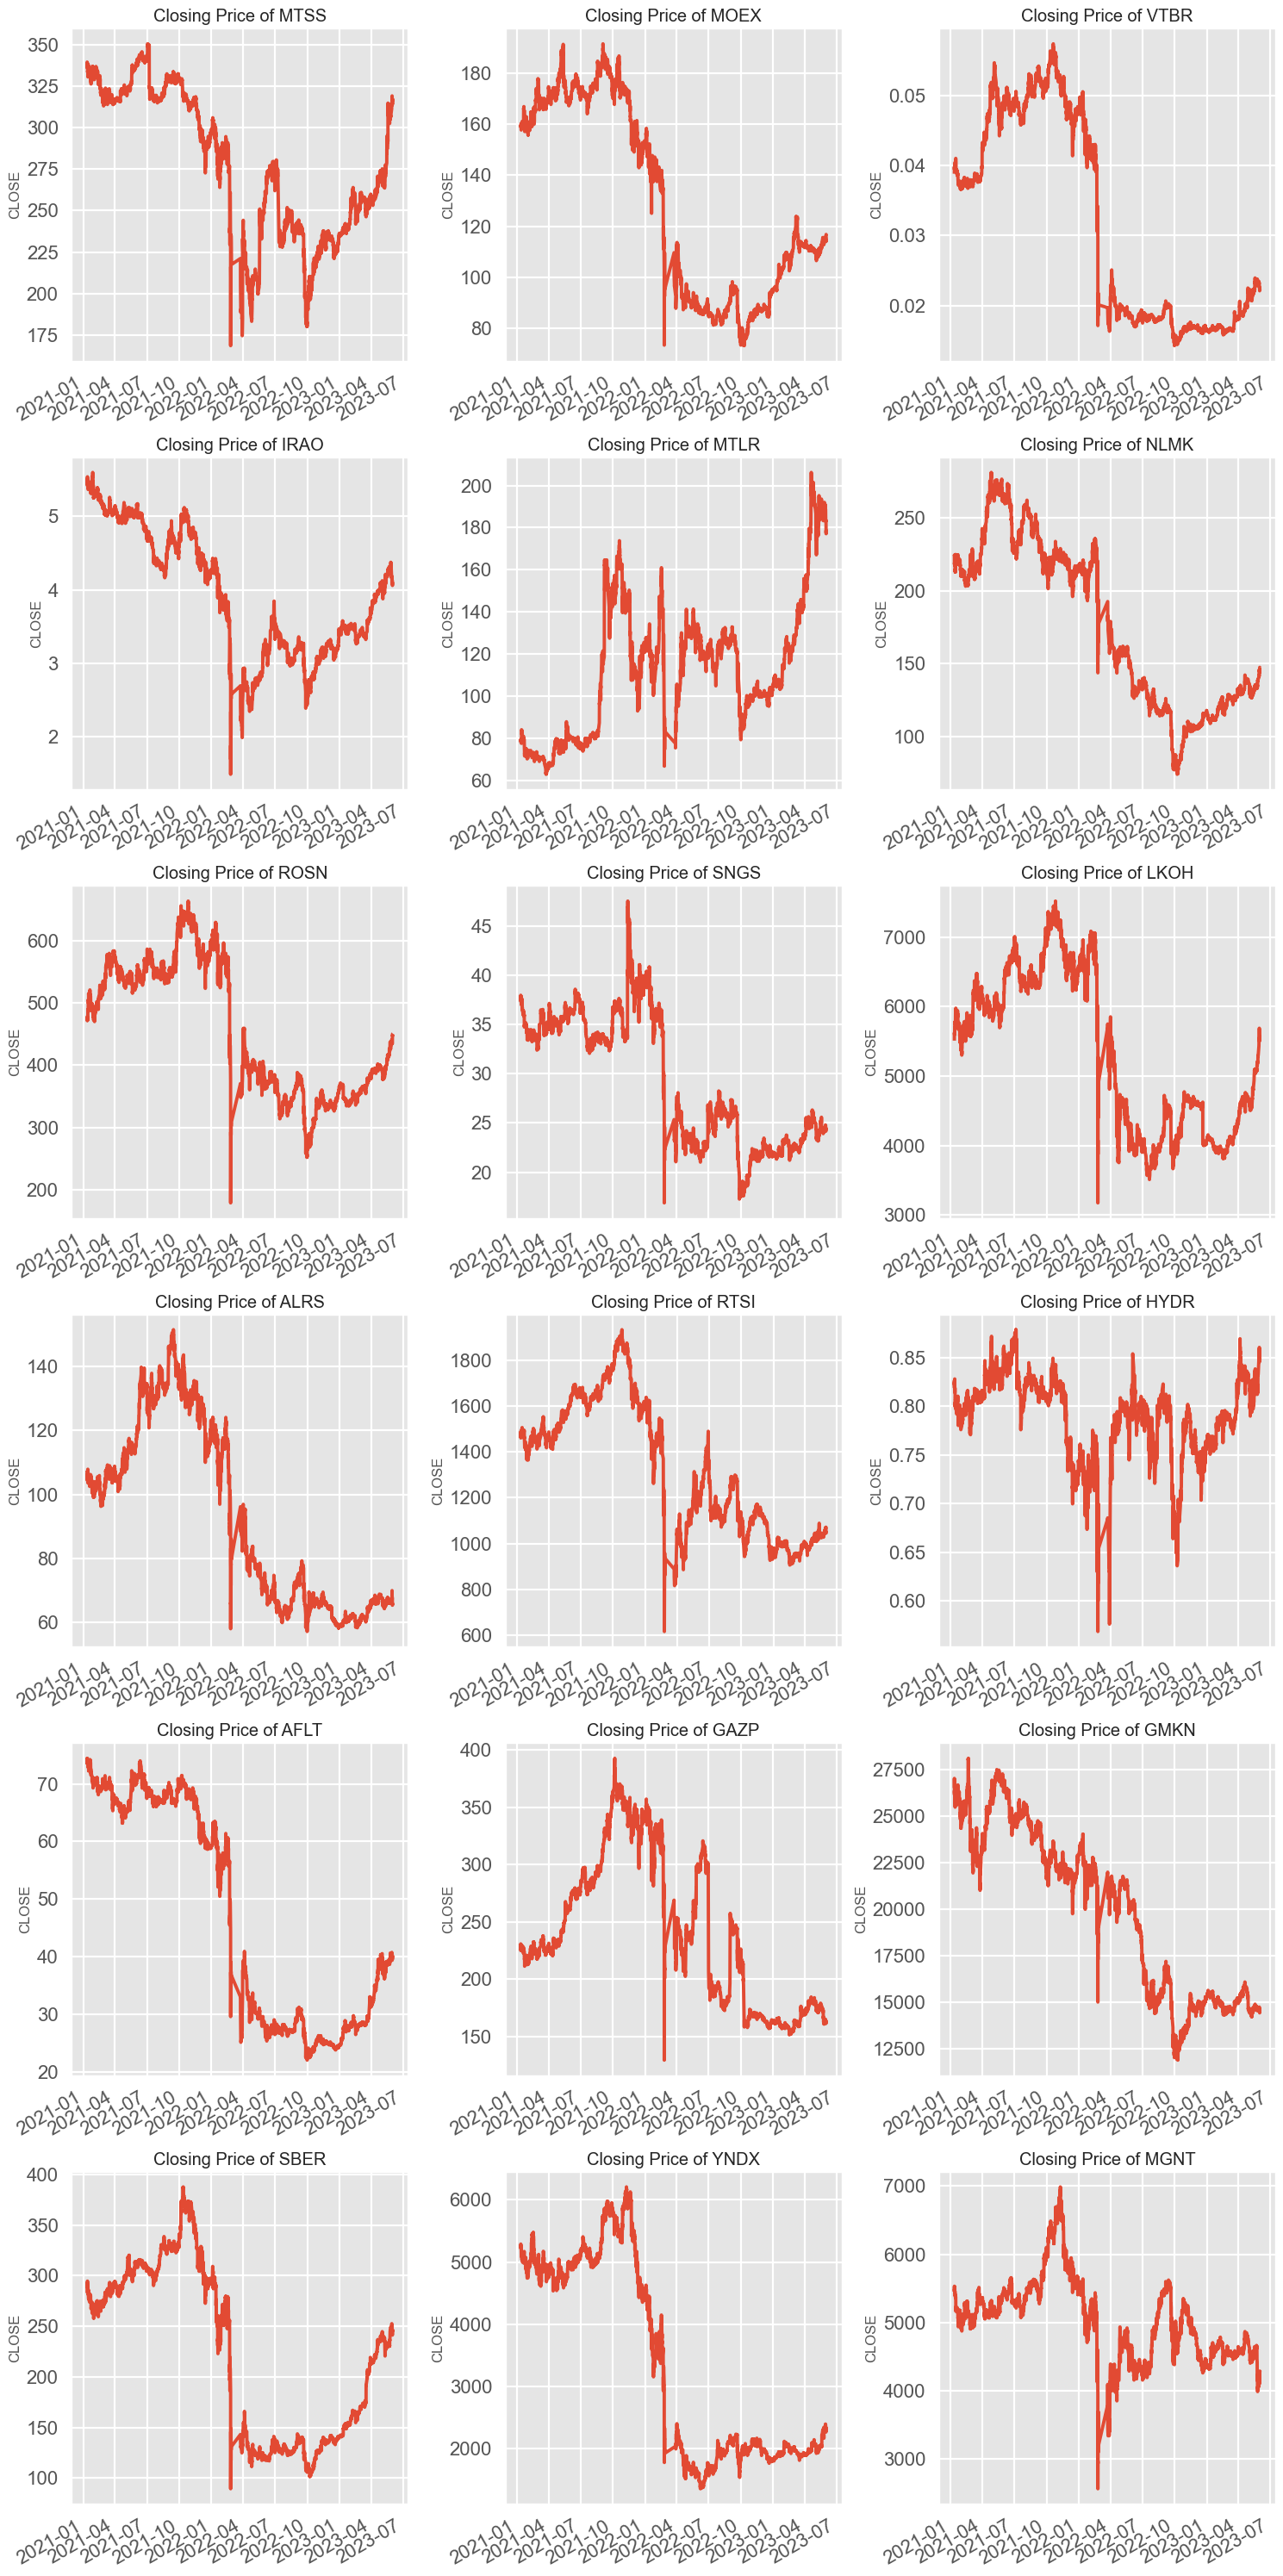

In [240]:
company_list = stock_values
tech_list = stock_names
plt.figure(figsize=(15, 30)) 
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(6, 3, i)
    company['<CLOSE>'].plot()
    plt.ylabel('CLOSE')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

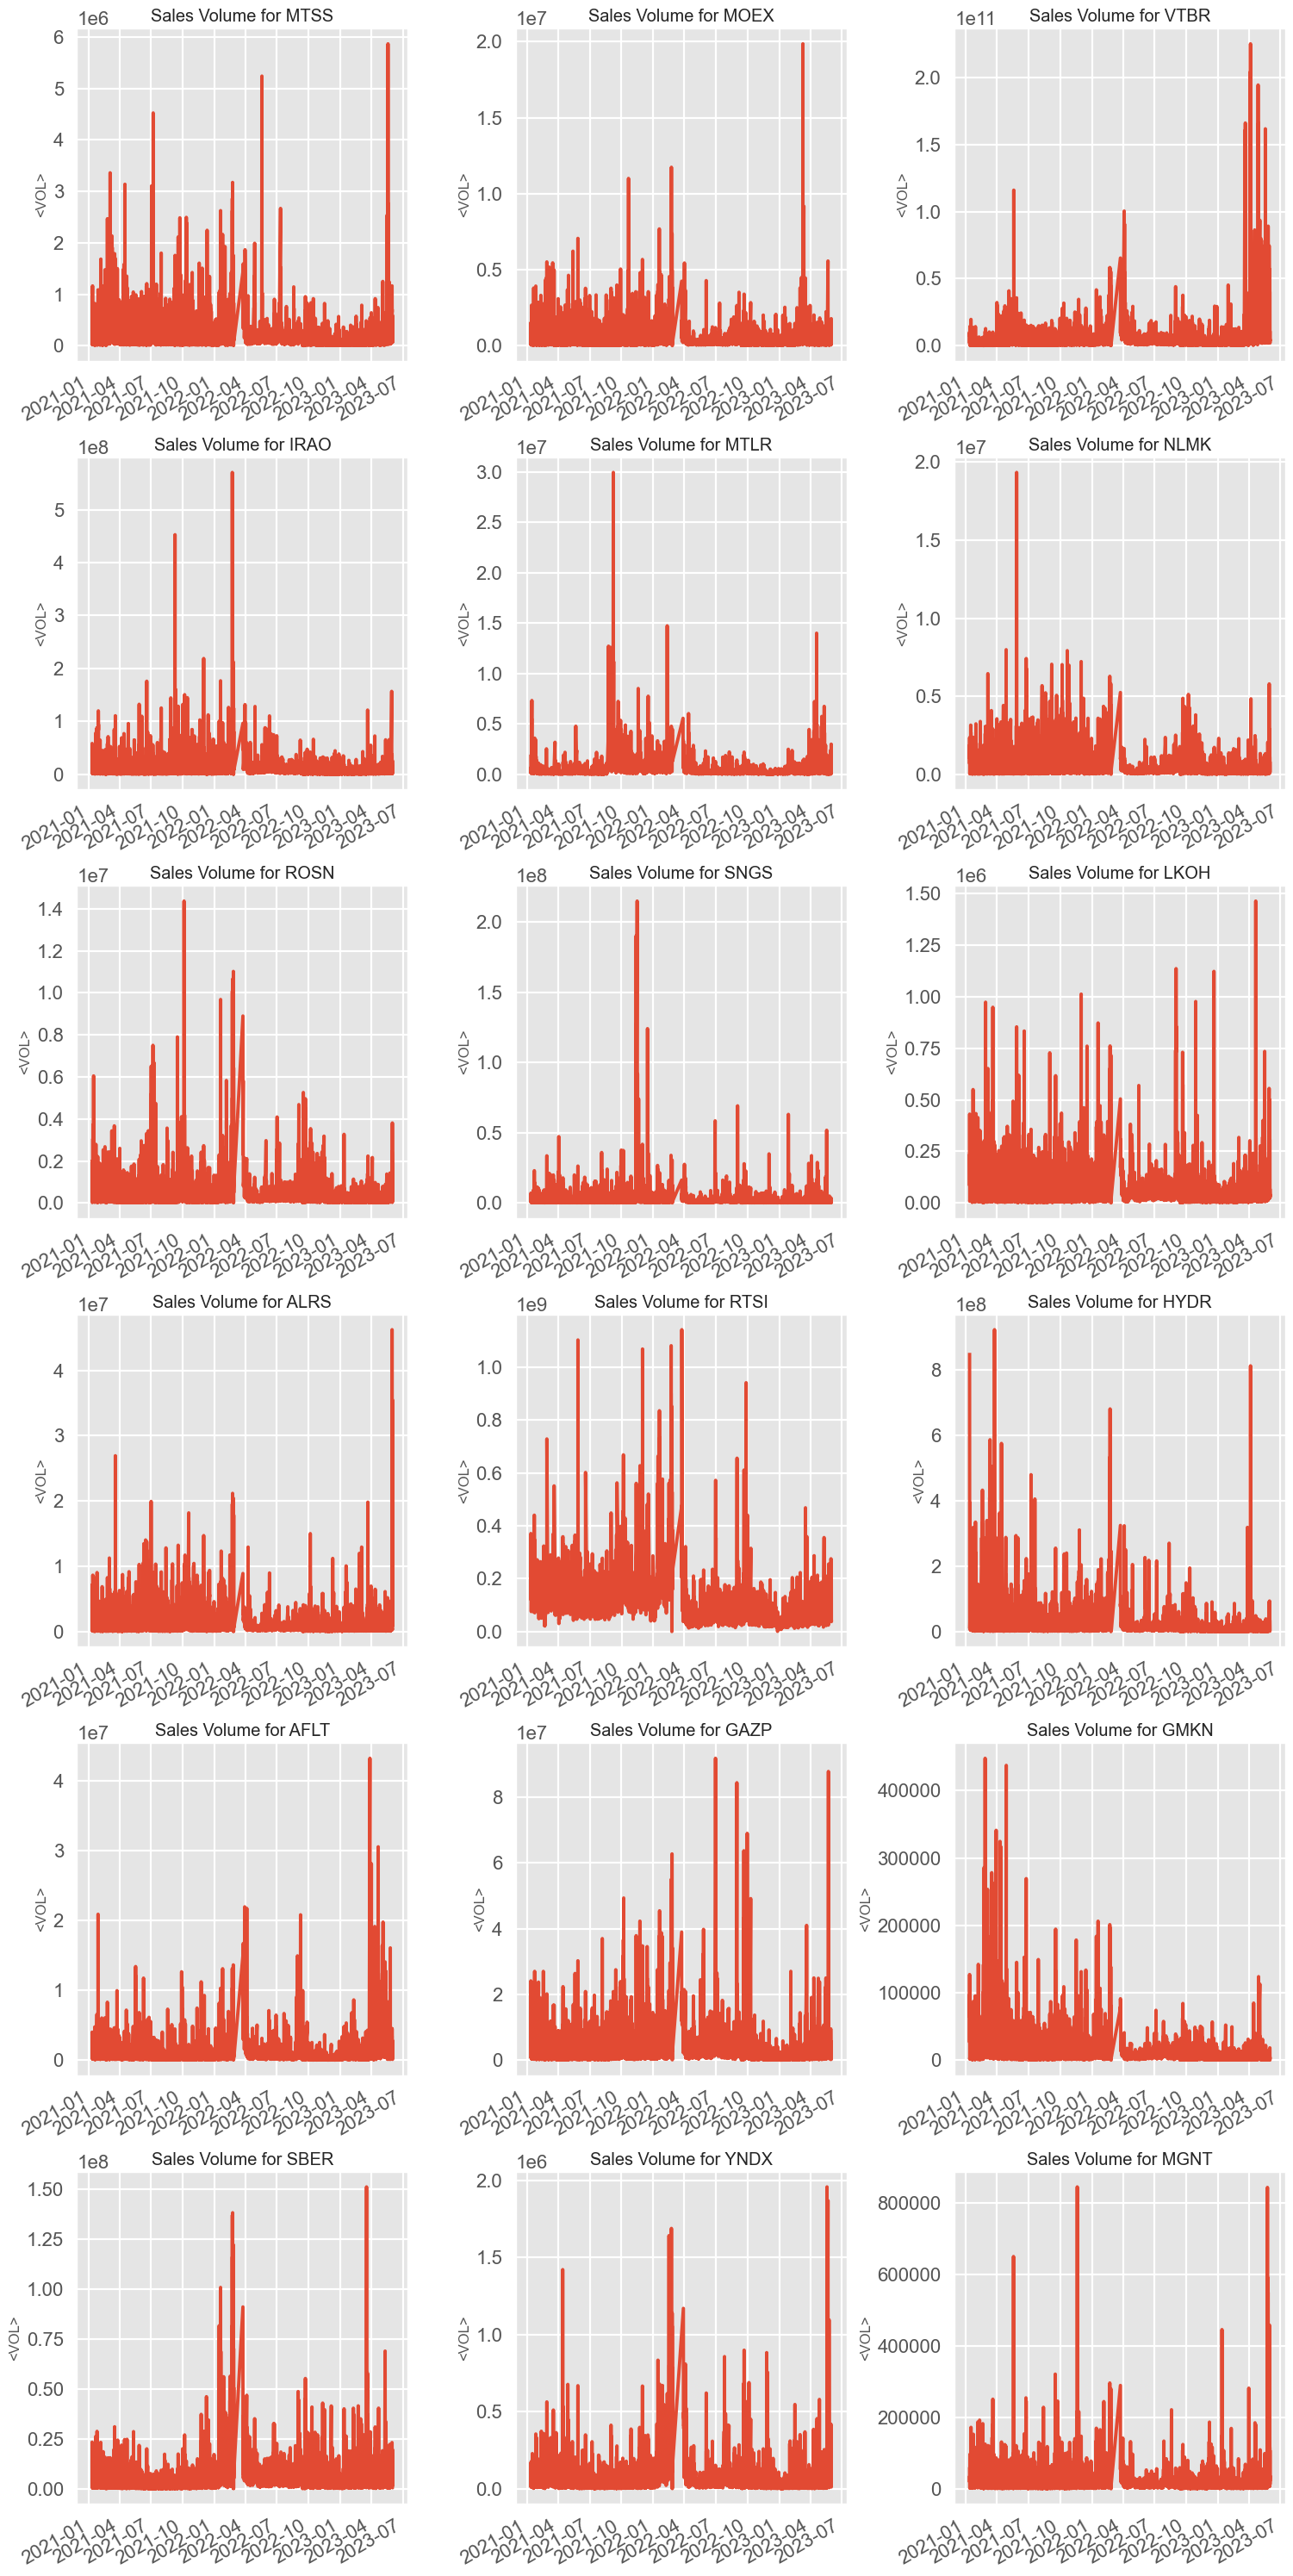

In [76]:
plt.figure(figsize=(15, 30))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(6, 3, i)
    company['<VOL>'].plot()
    plt.ylabel('<VOL>')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

### The moving average (MA) 

Скользящая средняя (MA) - это простой инструмент технического анализа, который сглаживает ценовые данные путем создания постоянно обновляемой средней цены. Среднее значение берется за определенный период времени, например, за 10 дней, 20 минут, 30 недель или любой период времени, который выберет трейдер.

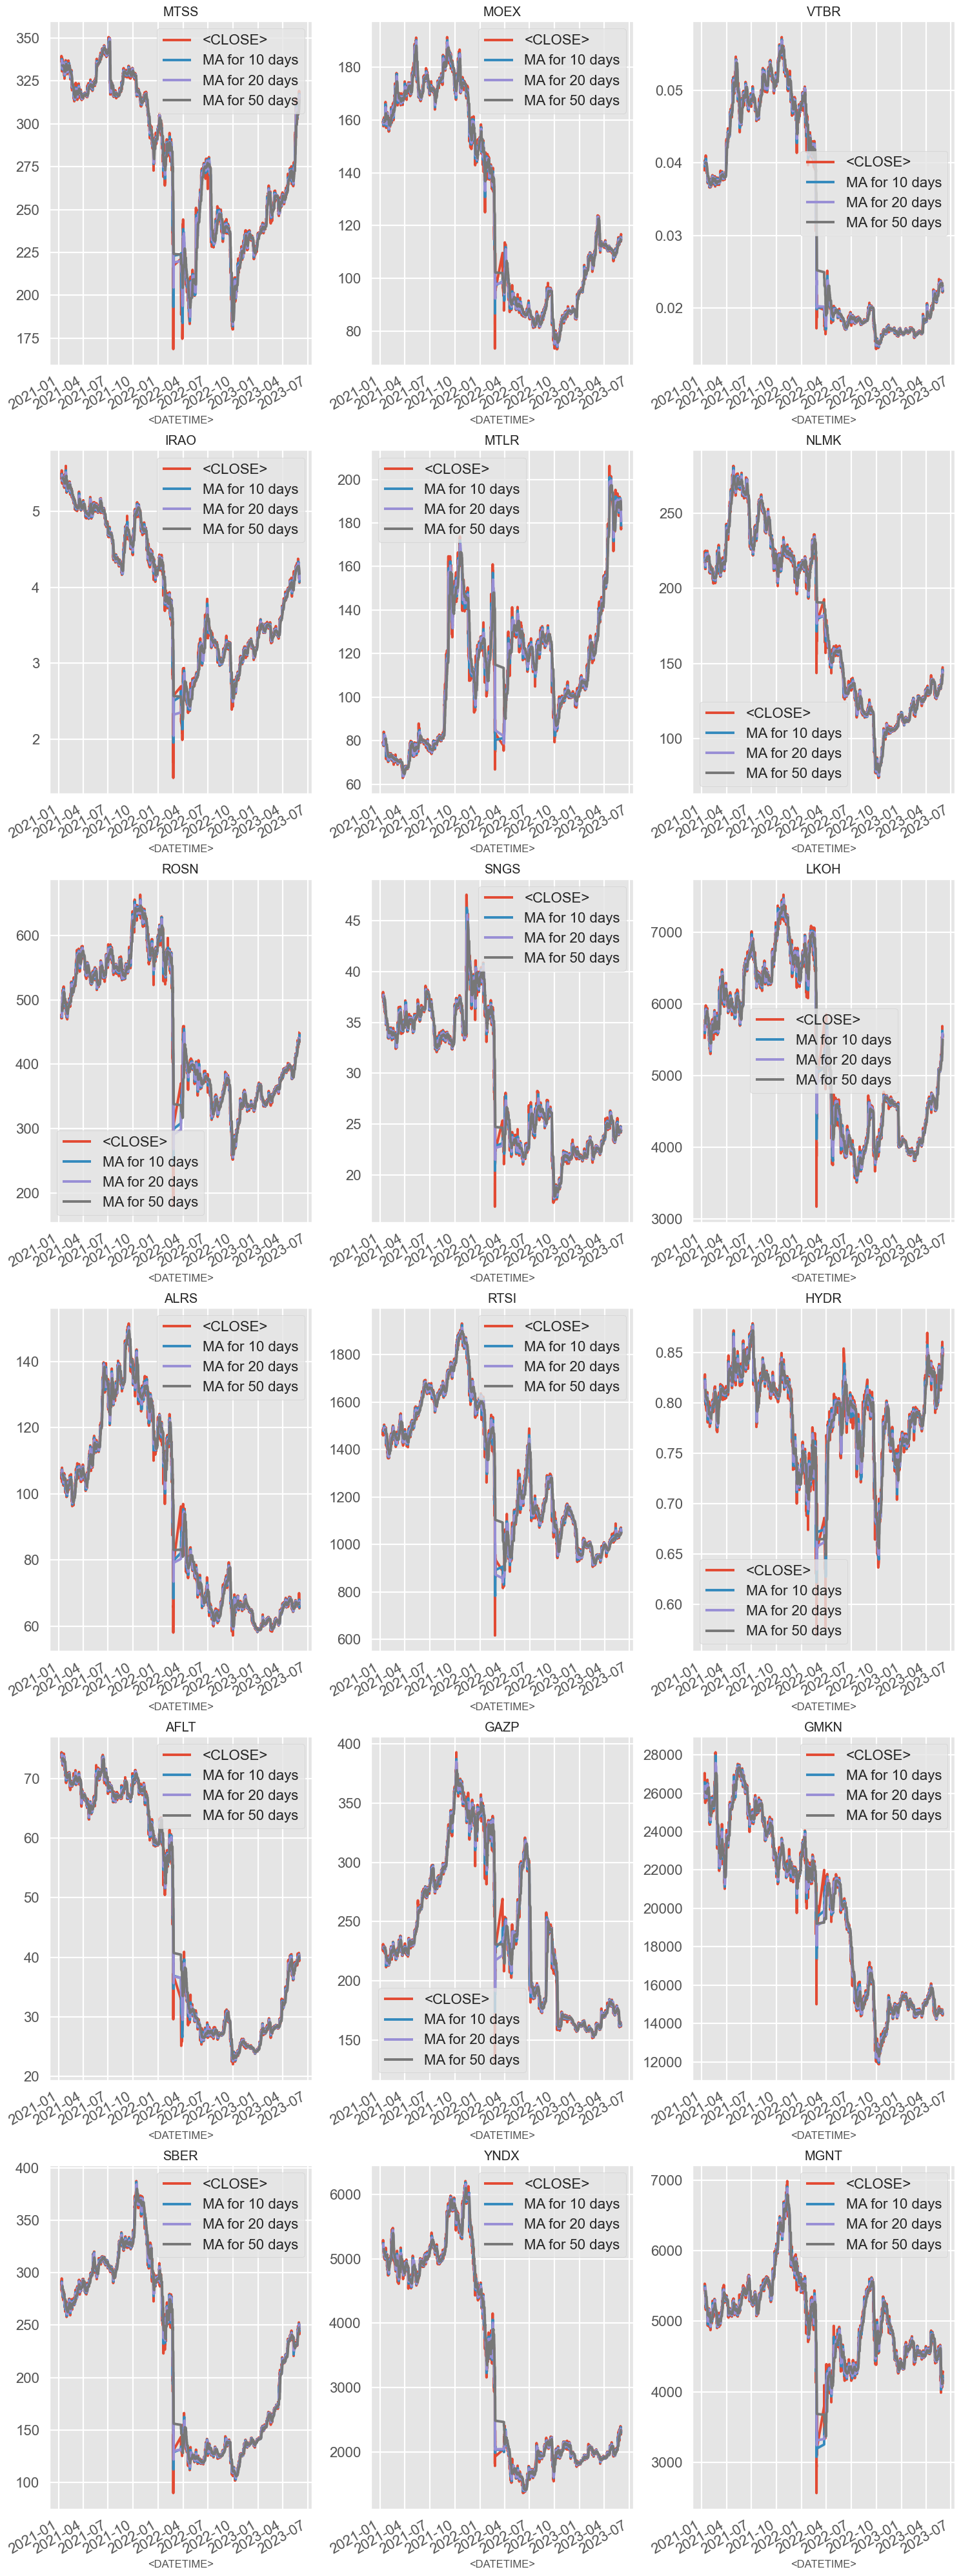

In [234]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['<CLOSE>'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=6, ncols=3)
fig.set_figheight(40)
fig.set_figwidth(15)

k = 0
n = 0
for i, company in enumerate(company_list, 1):
    if n >= 3:
        k+=1
        n=0 
    company[['<CLOSE>', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[k,n])
    axes[k,n].set_title(tech_list[i - 1])
    n+=1


fig.tight_layout()

### Анализ рисков

Теперь мы собираемся проанализировать риск акции. Для этого нам нужно более детально рассмотреть ежедневные изменения акций, а не только их абсолютное значение. Воспользуемся pandas для получения ежедневной доходности акций.

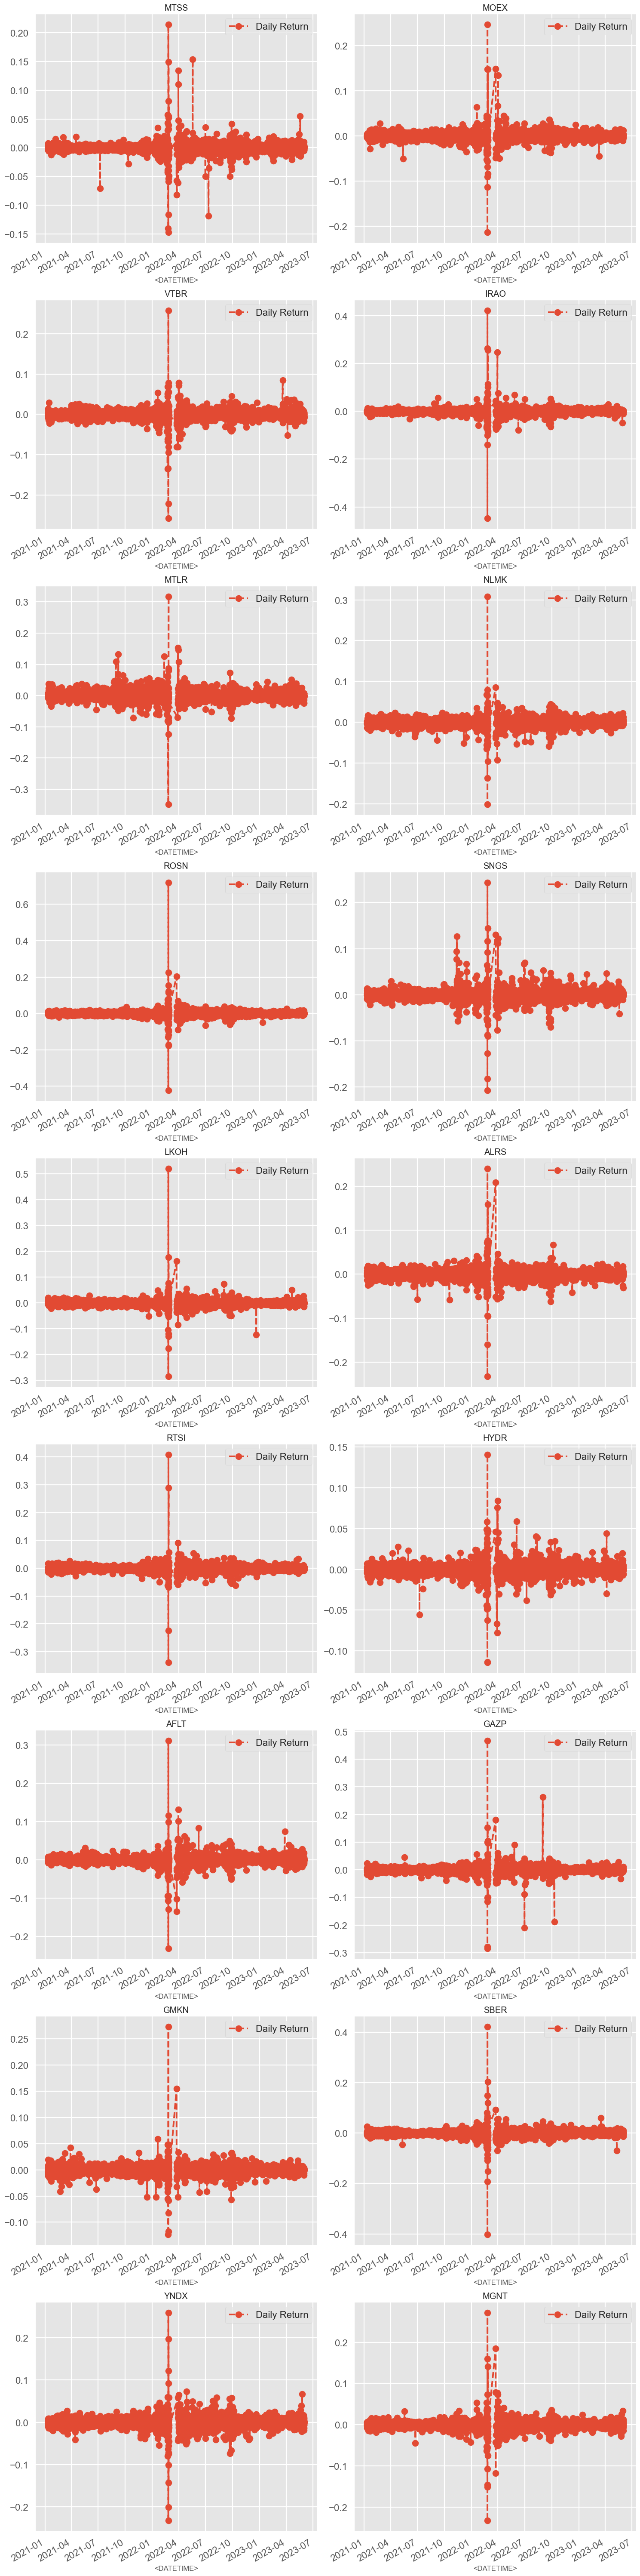

In [103]:
for company in company_list:
    company['Daily Return'] = company['<CLOSE>'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=9, ncols=2)
fig.set_figheight(60)
fig.set_figwidth(15)

k = 0
n = 0
for i, company in enumerate(company_list, 1):
    if n >= 2:
        k+=1
        n=0 
    company['Daily Return'].plot(ax=axes[k,n], legend=True, linestyle='--', marker='o')
    axes[k,n].set_title(tech_list[i - 1])
    n+=1


fig.tight_layout()

Теперь посмотрим на среднедневную доходность с помощью гистограммы. Мы будем использовать seaborn для создания гистограммы и kde plot на одном и том же рисунке.

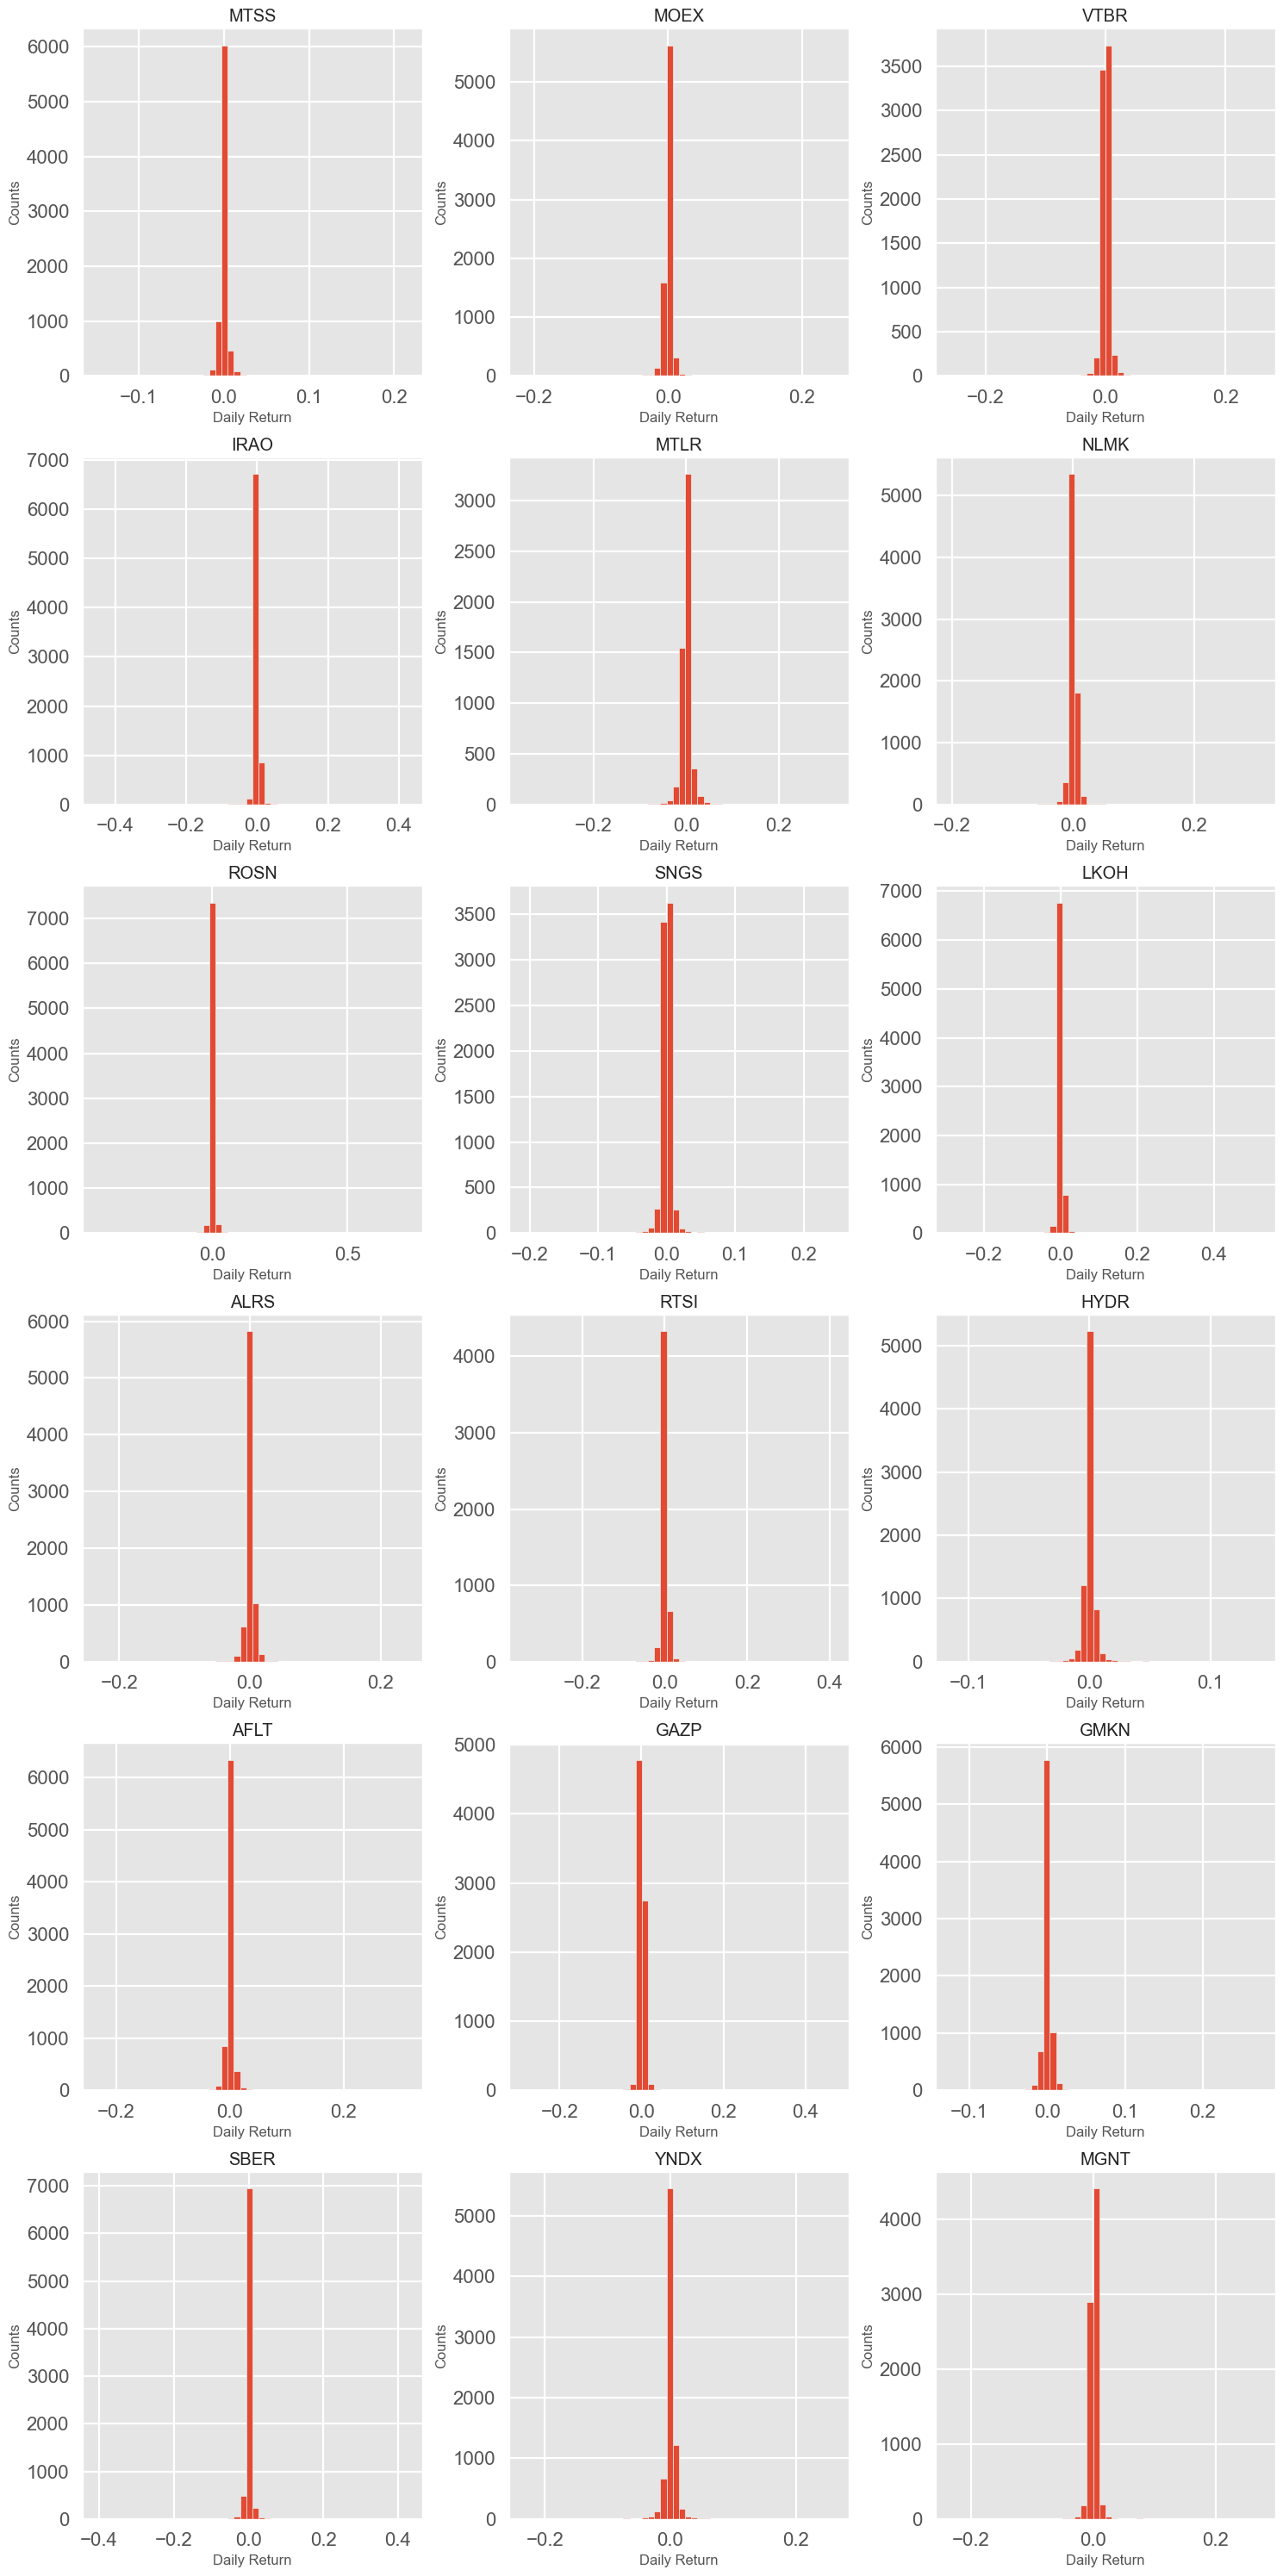

In [106]:
plt.figure(figsize=(15, 30))

for i, company in enumerate(company_list, 1):
    plt.subplot(6, 3, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{tech_list[i - 1]}')
    
plt.tight_layout()

### Какова корреляция между ценами закрытия различных акций?

Корреляция - это статистика, которая измеряет степень изменения двух переменных по отношению друг к другу, значение которой должно находиться в пределах от -1,0 до +1,0. Корреляция измеряет связь, но не показывает, является ли x причиной y или наоборот - или если связь вызвана третьим фактором.

А что если мы захотим проанализировать доходность всех акций из нашего списка? Давайте создадим DataFrame со всеми столбцами ['Close'] для каждого кадра акций.

In [ ]:
combined_df = None
for idx, stocks_data in enumerate(data_dict.items()):
    stocks_name, stocks_df = stocks_data
    if idx == 0:
        combined_df = stocks_df[['Daily Return']]
        previous_name = stocks_name
        continue
    combined_df = combined_df.join(stocks_df[['Daily Return']], lsuffix=previous_name, rsuffix=stocks_name)
    previous_name = stocks_name

daily_return_df = pd.DataFrame()
daily_return_df[stock_names]  = combined_df.dropna()

In [180]:
combined_df = None
for idx, stocks_data in enumerate(data_dict.items()):
    stocks_name, stocks_df = stocks_data
    if idx == 0:
        combined_df = stocks_df[['<CLOSE>']]
        previous_name = stocks_name
        continue
    combined_df = combined_df.join(stocks_df[['<CLOSE>']], lsuffix=previous_name, rsuffix=stocks_name)
    previous_name = stocks_name

close_prices_df = pd.DataFrame()
close_prices_df[stock_names]  = combined_df.dropna()

In [252]:
combined_df = None
for idx, stocks_data in enumerate(data_dict.items()):
    stocks_name, stocks_df = stocks_data
    if idx == 0:
        combined_df = stocks_df[['Daily Return, %']]
        previous_name = stocks_name
        continue
    combined_df = combined_df.join(stocks_df[['Daily Return, %']], lsuffix=previous_name, rsuffix=stocks_name)
    previous_name = stocks_name

daily_return_percent_df = pd.DataFrame()
daily_return_percent_df[stock_names]  = combined_df.dropna()

Добавим доходность в % к предыдущему значению

In [247]:
for i in np.arange(len(stock_values)):
    stock_values[i]['Daily Return, %'] = stock_values[i]['Daily Return']/(stock_values[i]['<CLOSE>'] - stock_values[i]['Daily Return'])*100

Итак, если две акции идеально (и положительно) коррелируют друг с другом, то между их дневными значениями доходности должна существовать линейная зависимость.

Seaborn и pandas позволяют провести этот сравнительный анализ для всех возможных комбинаций акций в нашем списке. Мы можем использовать sns.pairplot() для автоматического создания этого графика

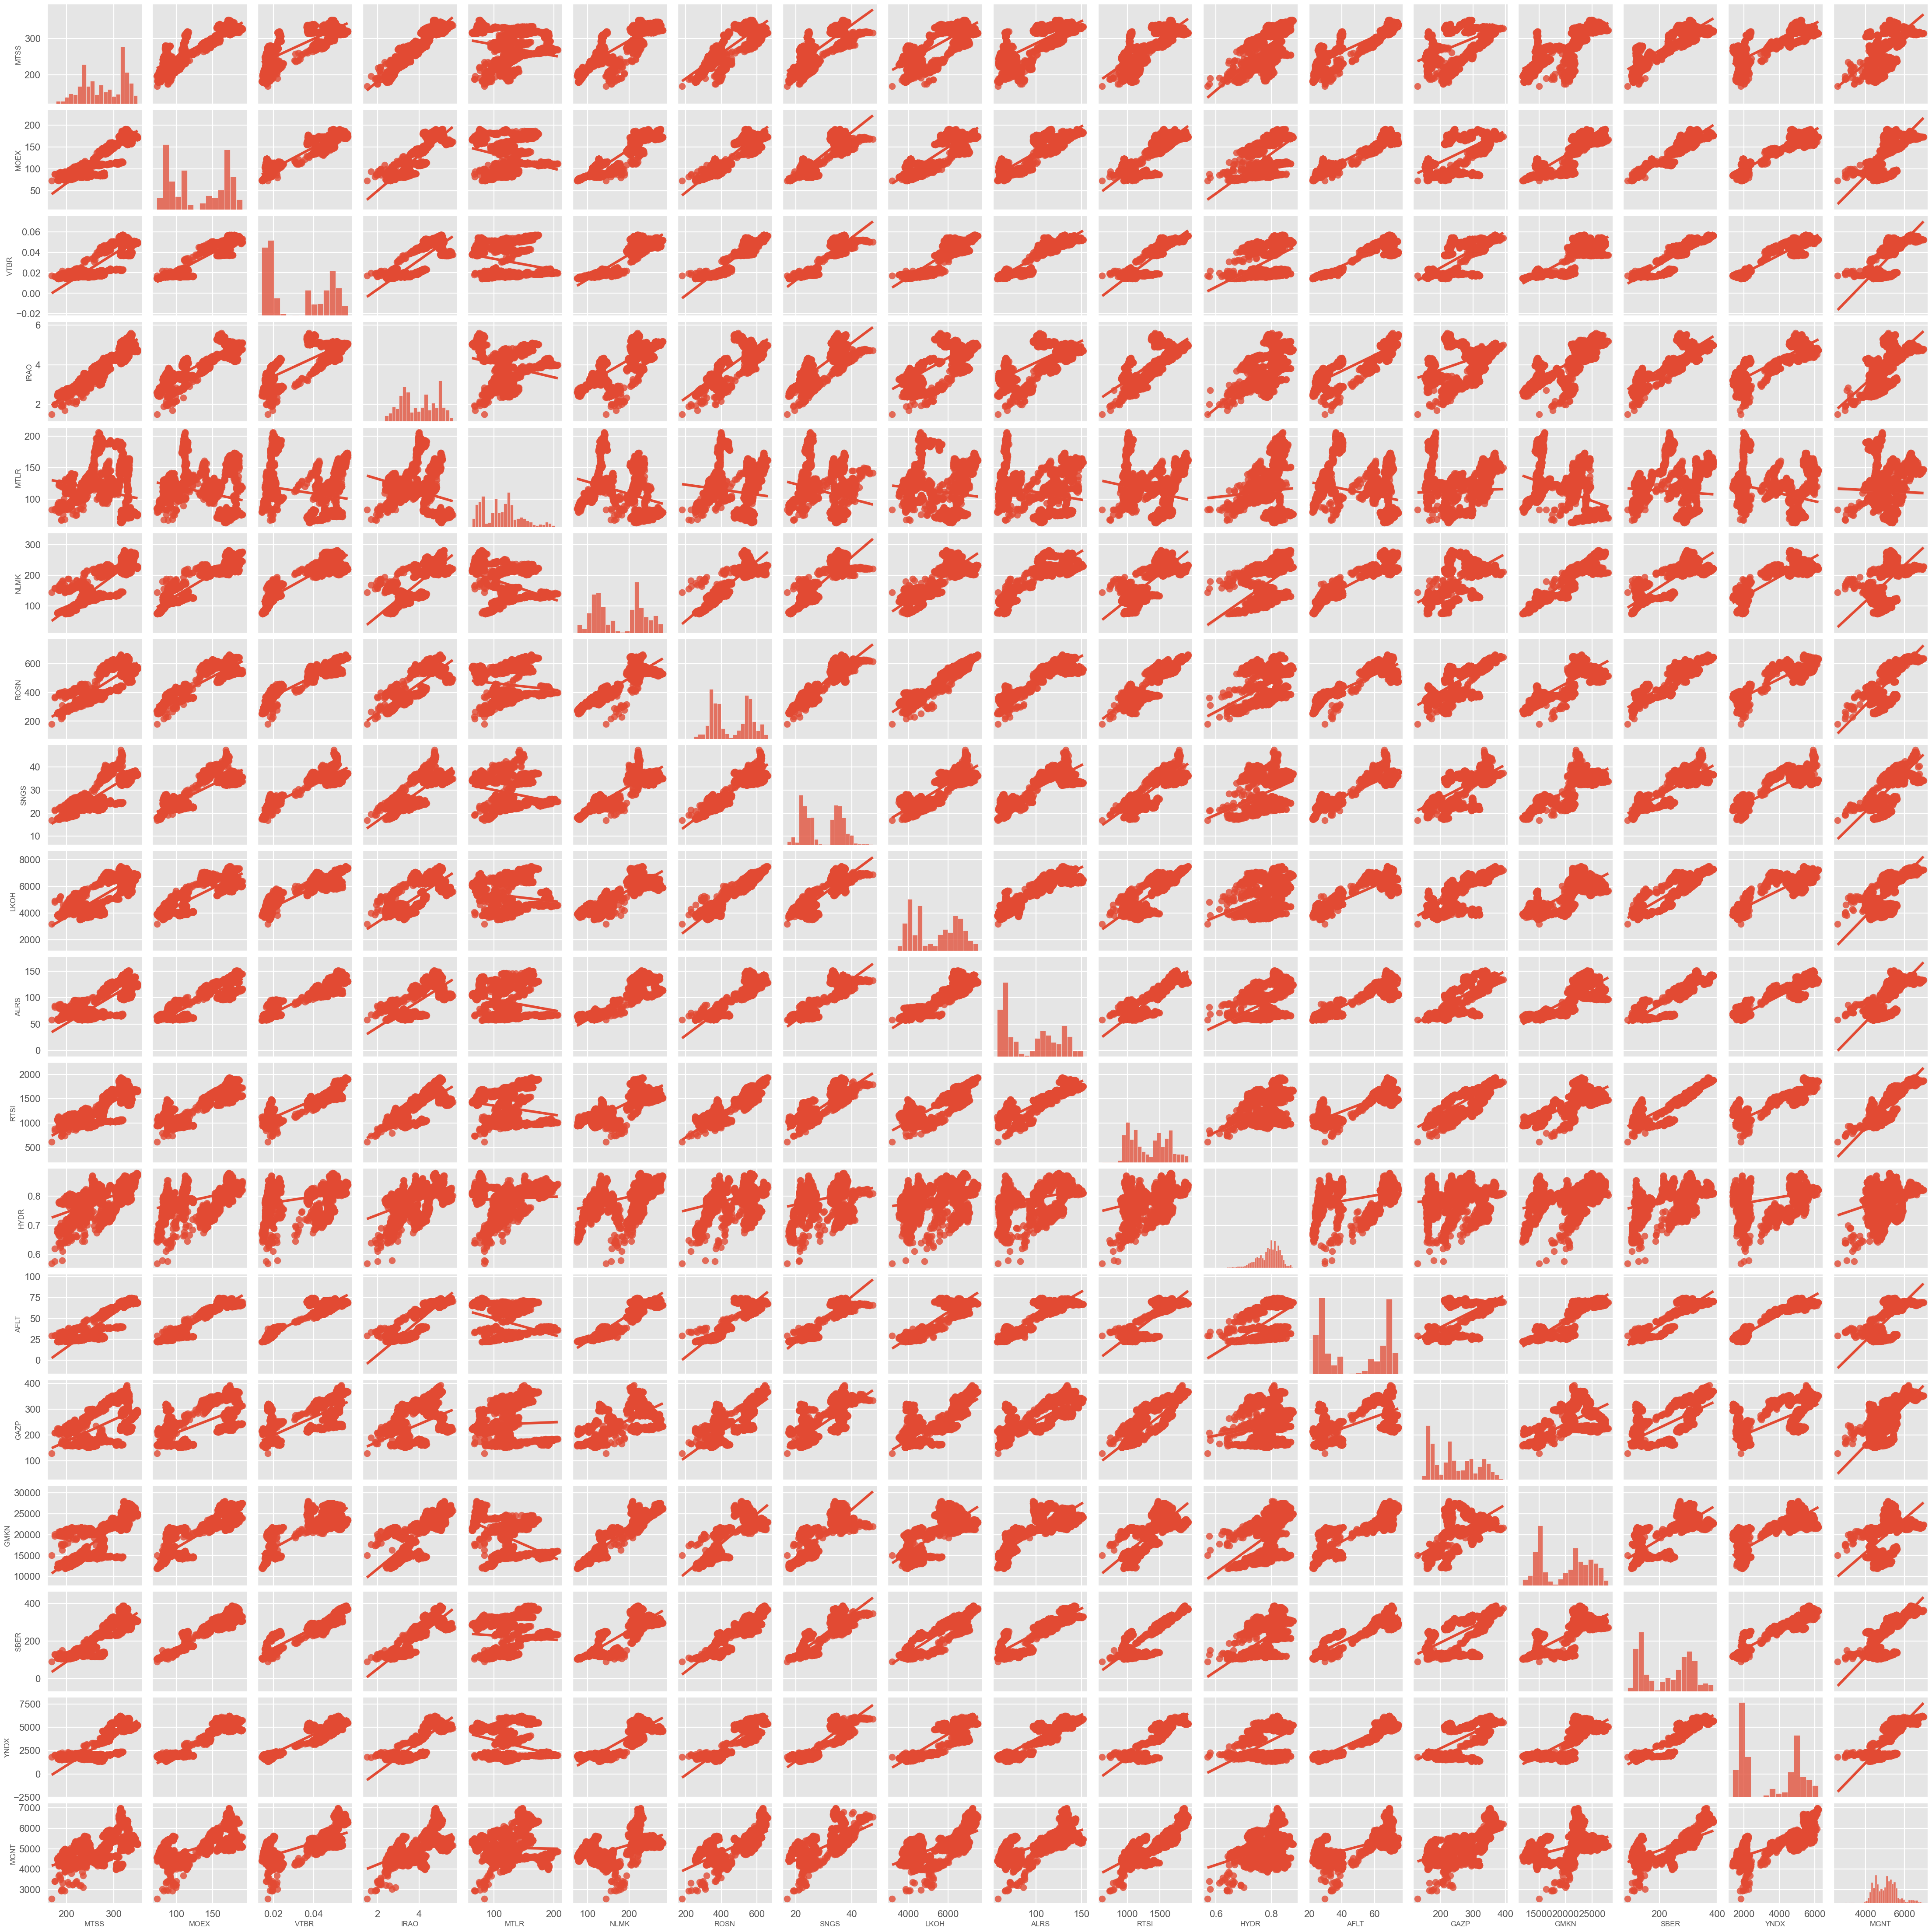

In [182]:
sns.pairplot(close_prices_df, kind='reg')

Мы также можем построить график корреляции, чтобы получить фактические числовые значения корреляции между дневными доходностями акций. 

Text(0.5, 1.0, 'Correlation of stock closing price')

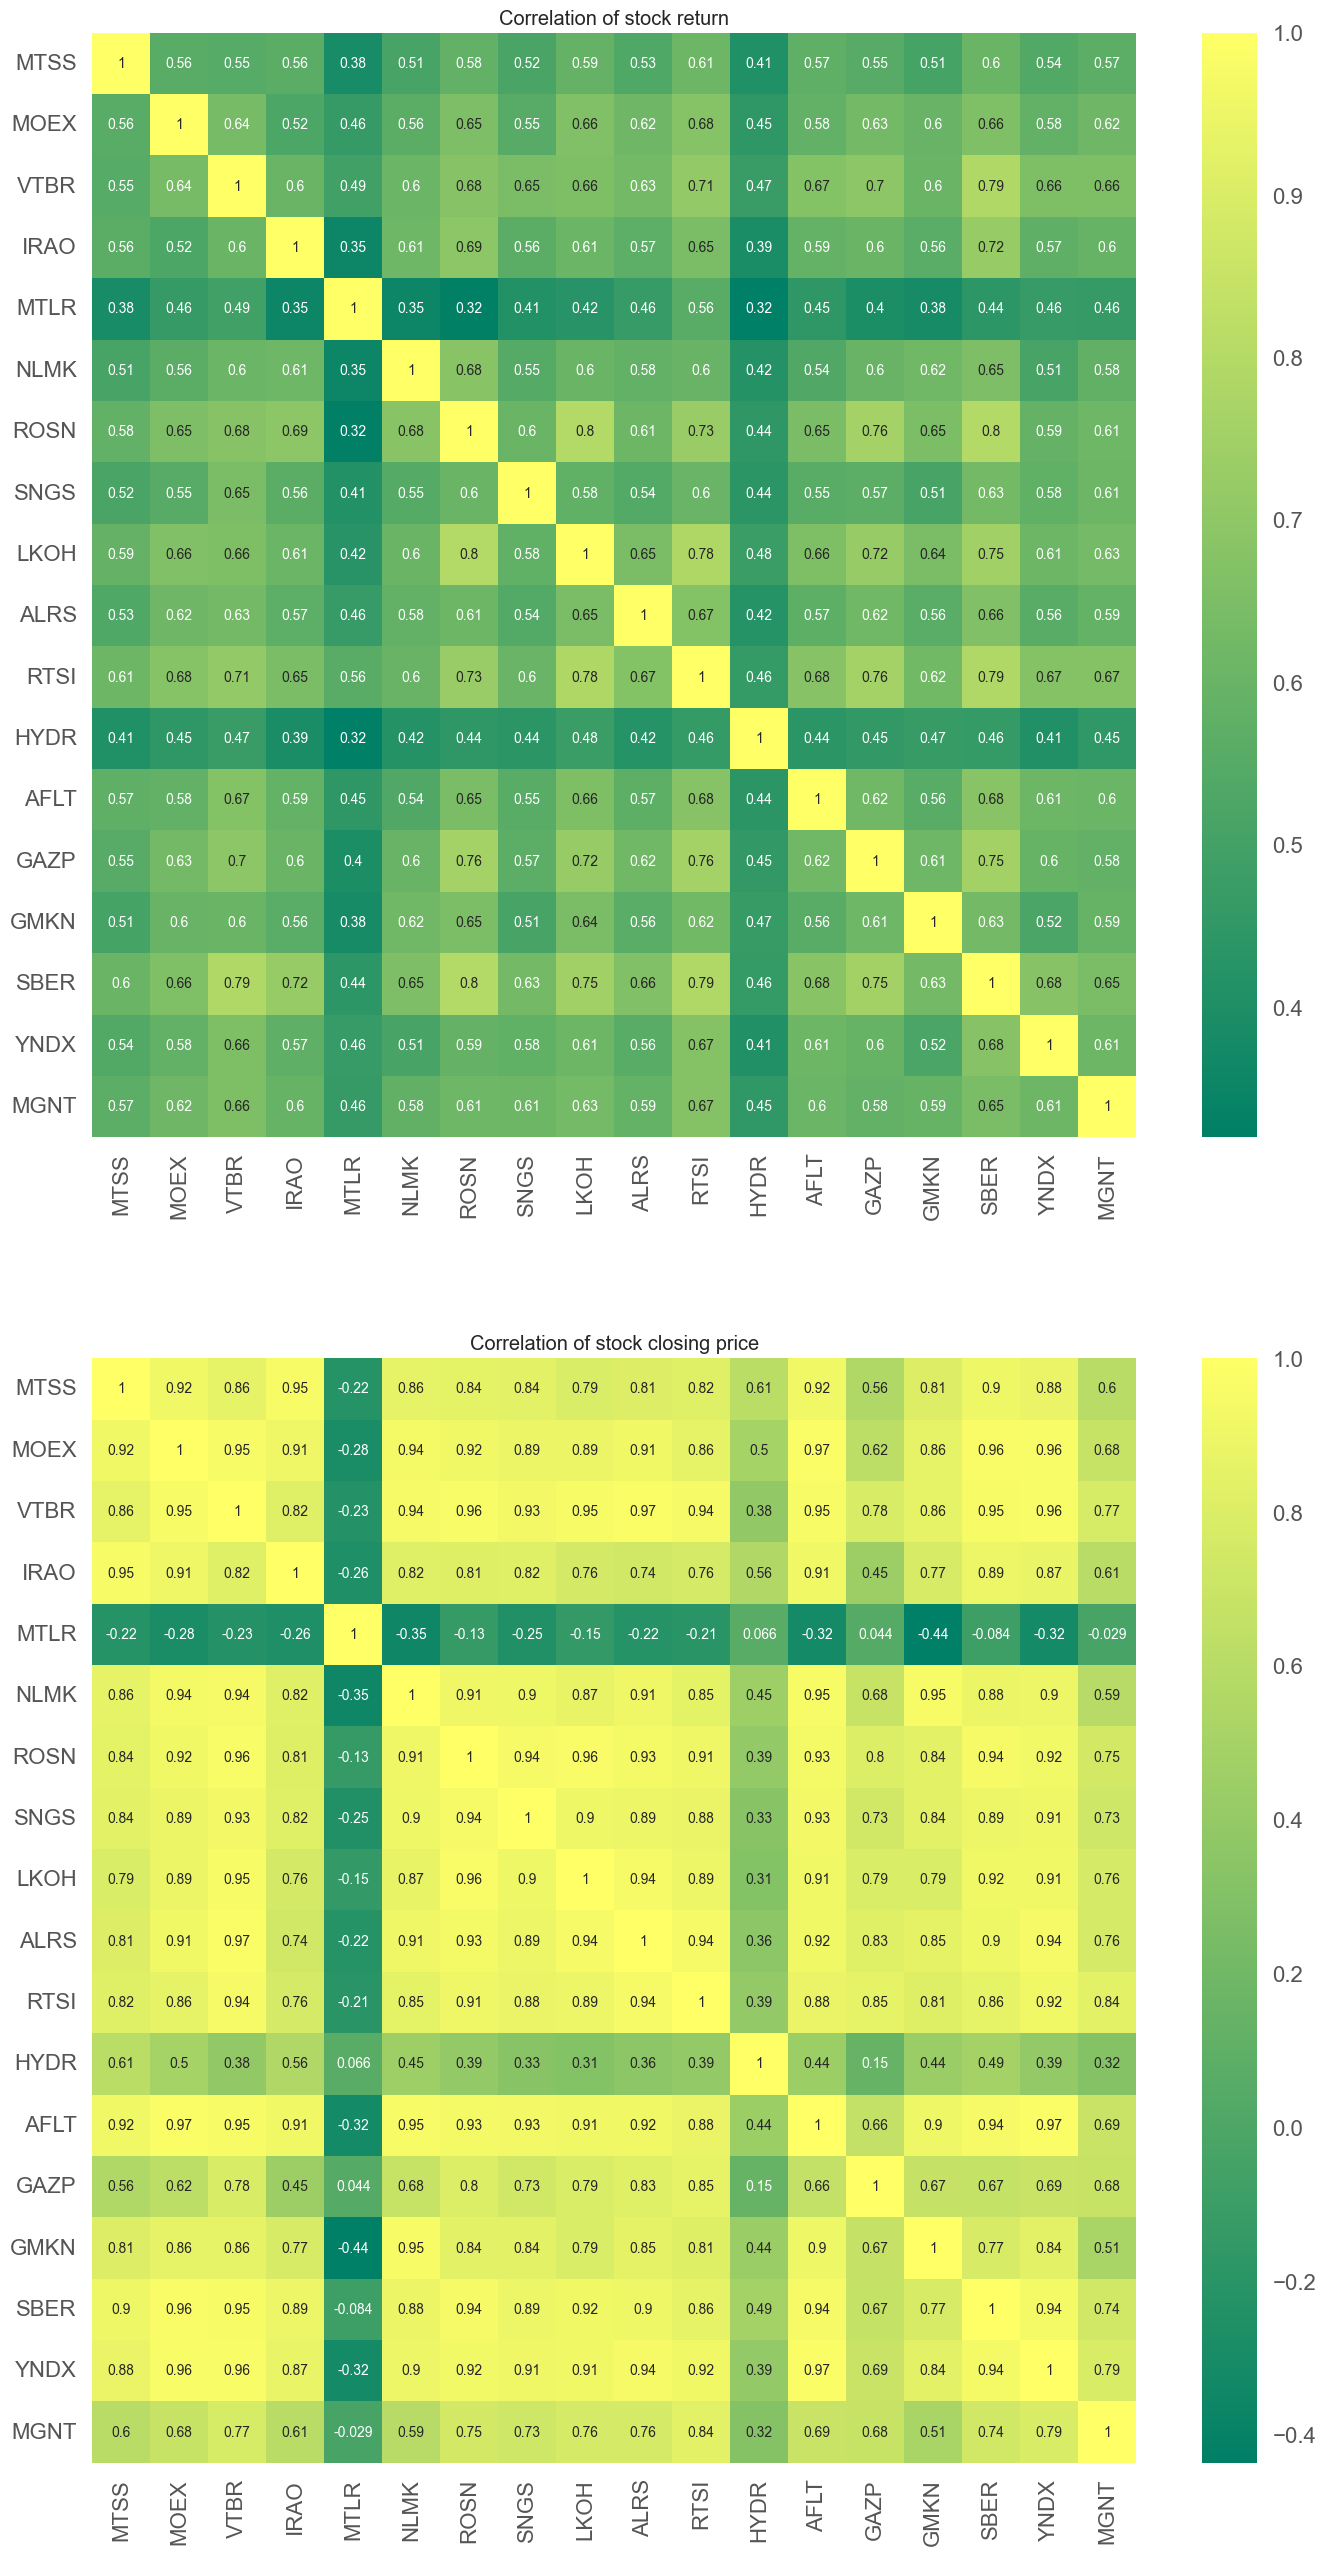

In [193]:
plt.figure(figsize=(15, 30))

plt.subplot(2, 1, 1)
sns.heatmap(daily_return_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 1, 2)
sns.heatmap(close_prices_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Существует множество способов количественной оценки риска, один из самых простых способов, использующий собранную нами информацию о ежедневной процентной доходности, - это сравнение ожидаемой доходности со стандартным отклонением ежедневной доходности.

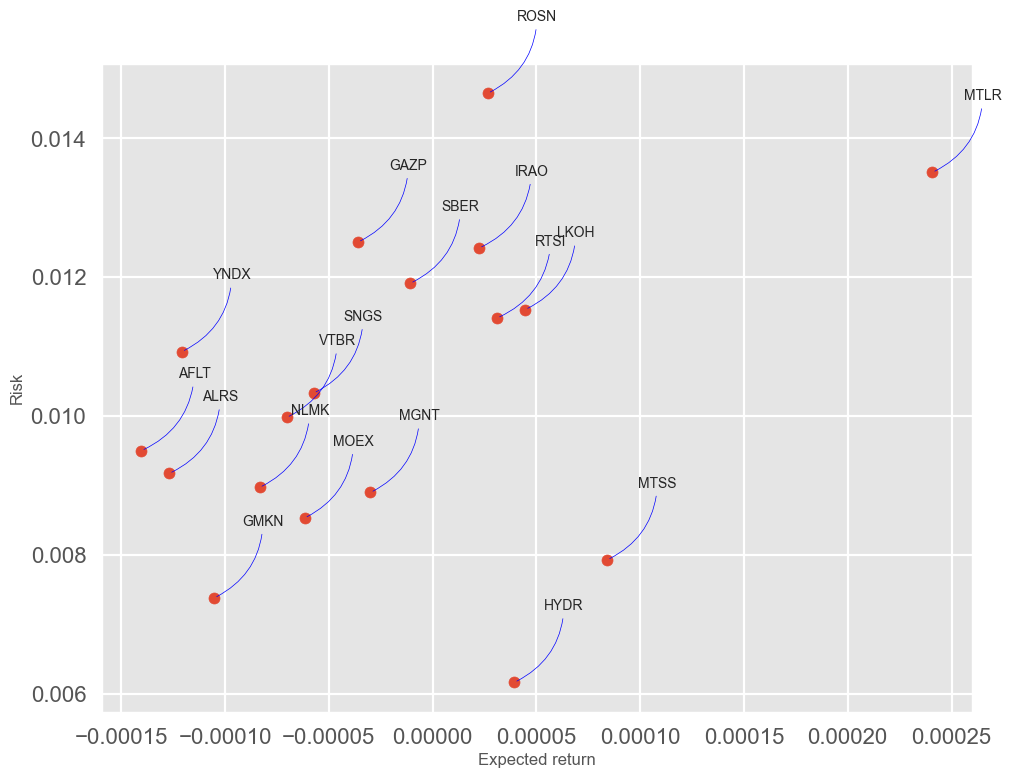

In [194]:
area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(daily_return_df.mean(), daily_return_df.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(daily_return_df.columns, daily_return_df.mean(), daily_return_df.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [230]:
daily_return_df_before = daily_return_df[:2563]
daily_return_df_after = daily_return_df[2599:]

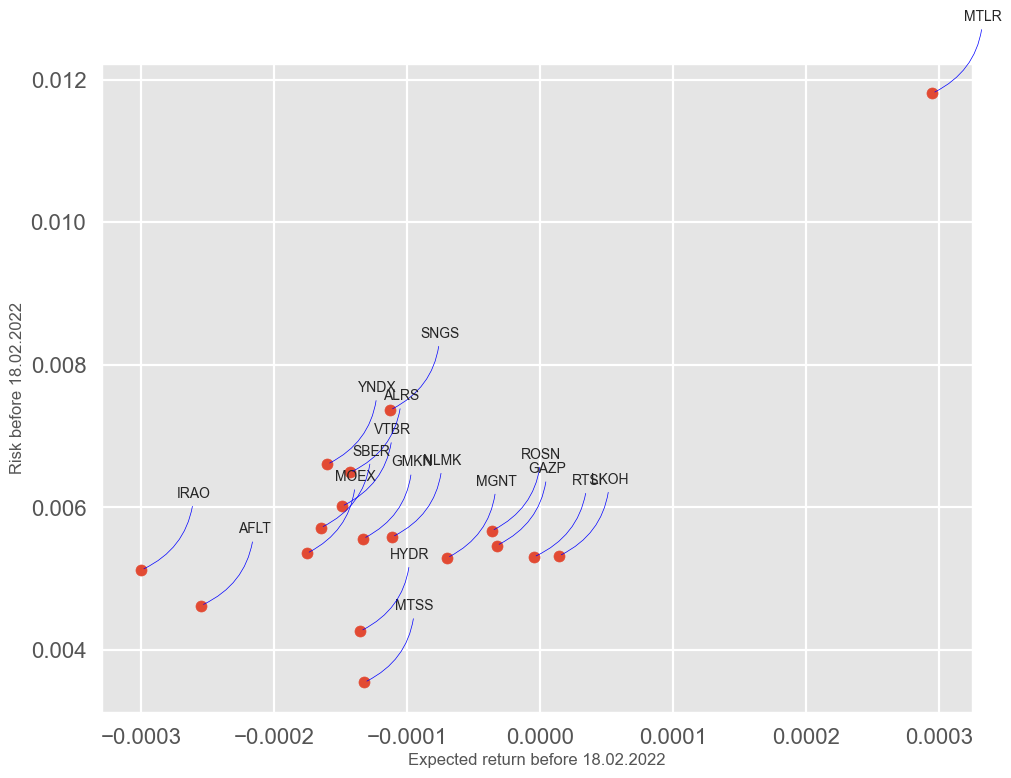

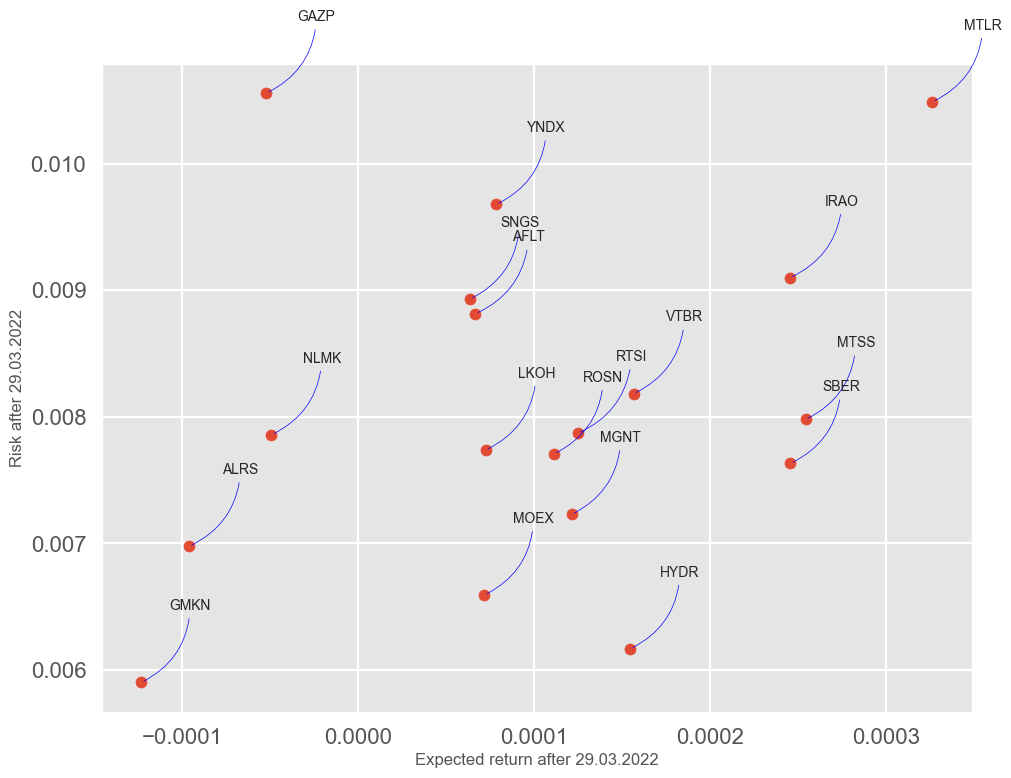

In [286]:
plt.figure(figsize=(10, 8))
plt.scatter(daily_return_df_before.mean(), daily_return_df_before.std(), s=area)
plt.xlabel('Expected return before 18.02.2022')
plt.ylabel('Risk before 18.02.2022')

for label, x, y in zip(daily_return_df_before.columns, daily_return_df_before.mean(), daily_return_df_before.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
    
plt.figure(figsize=(10, 8))
plt.scatter(daily_return_df_after.mean(), daily_return_df_after.std(), s=area)
plt.xlabel('Expected return after 29.03.2022')
plt.ylabel('Risk after 29.03.2022')

for label, x, y in zip(daily_return_df_after.columns, daily_return_df_after.mean(), daily_return_df_after.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


Посчитаем ковариацию между всеми ценными бумагами и индексом Мосбиржи


In [271]:
cov_df = daily_return_percent_df.cov()[['MOEX']]

In [284]:
slope_list = []
for i in stock_names:
    slope, intercept, r_value, p_value, std_err = stats.linregress(daily_return_percent_df['MOEX'], daily_return_percent_df[i])
    slope_list.append(slope)
    # print(intercept)


4.57372059389162e-05
0.0
-0.9344805087153492
0.005594682157494037
0.00019241645752501993
-4.3037264400428135e-05
8.476767910392722e-06
-0.00014740967654135097
1.0372440936371894e-06
-0.0001269817251229146
4.88985274544189e-06
0.015083903093034937
-0.00020305589327365857
-1.457501947689008e-05
-4.762802978073521e-07
1.4437729138864714e-05
-3.934985128632698e-06
-4.6370860053952226e-07


In [281]:
cov_beta_df = pd.DataFrame()
cov_beta_df['cov_with_MOEX'] = cov_df
cov_beta_df['beta'] = slope_list

In [283]:
cov_beta_df

cov_with_MOEX        beta
MTSS   1.937824e-05    0.256842
MOEX   7.544799e-05    1.000000
VTBR  -1.735681e-02 -230.050011
IRAO   2.813906e-03   37.295964
MTLR   5.861583e-05    0.776904
NLMK   2.998639e-05    0.397444
ROSN   3.049559e-05    0.404193
SNGS   2.341115e-04    3.102952
LKOH   1.598815e-06    0.021191
ALRS   7.057967e-05    0.935474
RTSI   8.066006e-06    0.106908
HYDR   3.925769e-03   52.032781
AFLT   1.463700e-04    1.940012
GAZP   3.789262e-05    0.502235
GMKN   2.273886e-07    0.003014
SBER   5.506126e-05    0.729791
YNDX   2.655027e-06    0.035190
MGNT   1.438498e-06    0.019066